In [1]:
import pandas as pd
import numpy as np
import seaborn
from nltk.corpus import stopwords
from itertools import chain
from nltk.probability import FreqDist

In [11]:
data_read=pd.read_csv("Cryptography_USA.csv",delimiter=",",header=0)
data_read.shape

(10560, 6)

In [10]:
data_read.head()

,ville,utituler_offre,entreprise,localisation,resume,description
0,New+York,Senior Consultant,Consult Hyperion,NaN,Who are we looking for: CHYP USA (Consult Hype...,"$90,000 - $110,000 a yearWho are we looking fo..."
1,New+York,Consultant,Consult Hyperion,NaN,O Security & Cryptography. CHYP USA (Consult H...,CHYP USA (Consult Hyperion) is currently looki...
2,New+York,Office Administrator,Axoni,NaN,"Our diverse team of technologists, capital mar...",Axoni is a capital markets focused distributed...
3,New+York,Vulnerability Specialist,New York City DEPT OF INFO TECH & TELECOMM,NaN,"¿ Knowledge of public-key cryptography, unders...","$75,000 - $100,000 a yearAbout New York City C..."
4,New+York,Blockchain Research Scientist,Axoni,NaN,Theoretical and Applied Cryptography. Axoni de...,Axoni develops novel blockchain solutions whil...


## Preprocessing:

In [12]:
# enlever ponctuation
data_read["resume"]= data_read["resume"].str.replace('[^\w\s]','')
data_read["description"]=data_read["description"].str.replace('[^\w\s]','')
# transformer les lettres en minuscule:
data_read["resume"] = data_read["resume"].apply(lambda x: " ".join(x.lower() for x in np.str(x).split()))
data_read["description"]=data_read["description"].apply(lambda x: " ".join(x.lower() for x in np.str(x).split()))
# enlever stopword 
stop = stopwords.words('english')
data_read["resume"] = data_read["resume"].apply(lambda x: " ".join(x for x in np.str(x).split() if x not in stop))
data_read["description"]=data_read["description"].apply(lambda x: " ".join(x for x in np.str(x).split() if x not in stop))

## Analyse descriptif:
Tout d'abord, on va faire une fonction qui va retourner un dataframe contenant la liste des mots comme rowname et comme colonne les occurences.

In [13]:
from collections import Counter
import nltk
tokenizer = nltk.RegexpTokenizer(r'\w+')
def word_count_text(List_text,N_min=7500,tokenizer_true=False):
    der="".join(List_text)
    tokens = nltk.word_tokenize(" ".join(List_text))
    fdist=FreqDist(tokens)
    ## Compter le nombre d'occurence des mots
    dict_word=dict(fdist)
    # On enregistre les mots dans un dataframe
    pd_dict_word=pd.DataFrame(list(dict_word.values()),index=dict_word.keys(),columns=["occurence"])
    pd_dict_word=pd_dict_word.sort_values(by="occurence",ascending=False)
    ## On filtre les mots dont l'occurence sont supérieurs à N_min
    pd_dict_word=pd_dict_word.loc[pd_dict_word.occurence>N_min,:]
    # on retourne un dataframe
    return pd_dict_word

In [14]:
description=data_read.description.tolist()
pd_dict_word= word_count_text(description)

## Visualisation des mots les plus fréquents

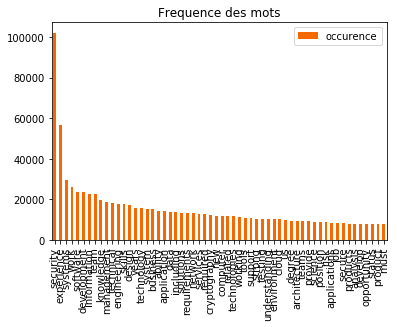

In [15]:
pd_dict_word.plot(kind='bar', color="#f56900", title='Frequence des mots');

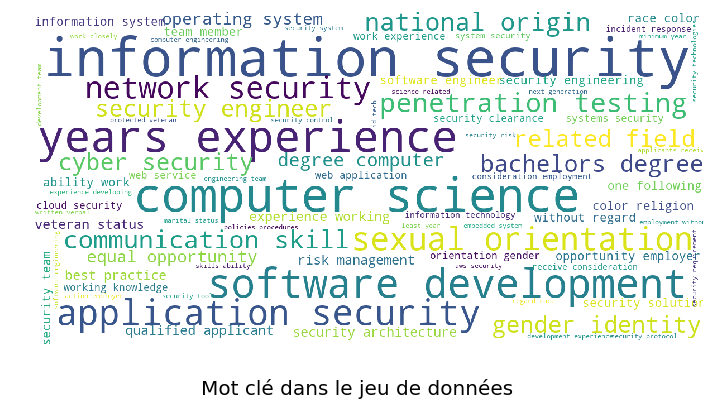

In [17]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt 
comment_words =""
for single in data_read['description']:
    comment_words = str(comment_words)
    comment_words += single
stopwords = set(STOPWORDS) 
def show_wordcloud(data,stopwords=stopwords,title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()
    
show_wordcloud(comment_words,title="Mot clé dans le jeu de données")

In [18]:
Mot_cle_technique = ['python','r','sql','java','scala','excel',"ruby",
        'aws','hadoop','spark','linux','tableau',"nosql","Oracle","etl","crm",
               'linux','sas','hive','oracle','perl',"informatica",'Cognos',"hbase",
               'mysql','html','sap','spss','mongodb',"c++","postgresql","pig"]

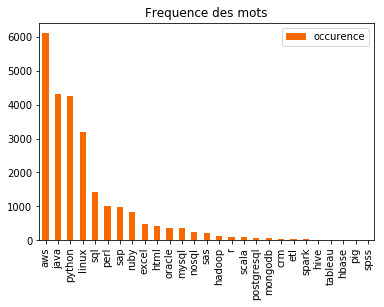

In [19]:
pd_dict_word_all=word_count_text(description,N_min=0)
bol=[True if k in Mot_cle_technique else False for k in pd_dict_word_all.index ]
mot_outils=pd_dict_word_all[bol]
mot_outils.plot(kind='bar', color="#f56900", title='Frequence des mots');

## 